In [ ]:
MODEL_FLAGS="--attention_resolutions 32,16,8 --class_cond False --diffusion_steps 1000 --image_size 128 --learn_sigma True --noise_schedule cosine --num_channels 128 --num_heads 4 --num_res_blocks 2 --resblock_updown True --use_fp16 True --use_scale_shift_norm True"
MODEL_PATH="--model_path /poc-data/pvn/model/diffusion/GenerativeDiffusionPrior/results/ckpt/model300000.pt"
SAMPLE_FLAGS="--mask_ratio 0.4 --noise_scale 0.1 --gradient_scale 0.5"
!python3 sample.py $MODEL_FLAGS $MODEL_PATH $SAMPLE_FLAGS --cuda_devices '0' --batch_size 2 --start_idx 16 --end_idx 19 --mode test --data_dir '/poc-data/pvn/data' --dataset 'F3,Kerry3D'

Evaluation on dataset(s):  F3,Kerry3D
(255, 601, 200)
(1252, 144, 295)
Number data: 14624
 37%|█████████▏               | 368/1000 [00:42<01:10,  8.93it/s, distance=20.6]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = np.load('samples/sample0.npz')

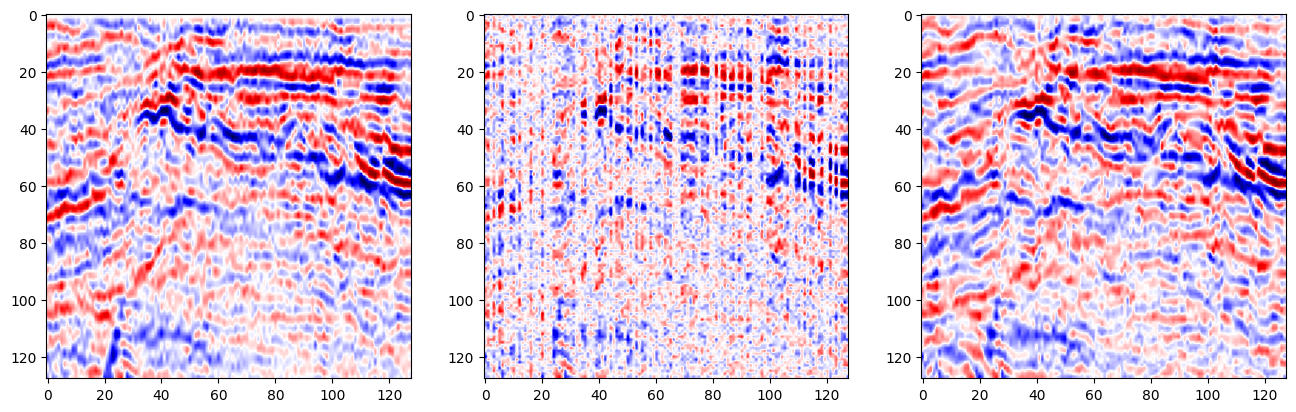

In [16]:
plt.figure(figsize=(16,48))
plt.subplot(1,3,1)
plt.imshow(data['original'], plt.cm.seismic)
plt.subplot(1,3,2)
plt.imshow(data['masked_image'], plt.cm.seismic)
plt.subplot(1,3,3)
plt.imshow(data['sample'], plt.cm.seismic)

In [19]:
from scripts.guided_diffusion.logger import CSVOutputFormat

In [20]:
csvwriter = CSVOutputFormat('test.csv')

In [21]:
test = {'id': 1, 'ssim': 0.9, 'psnr': 23.34, 'snr': 19.8}

In [22]:
csvwriter.writekvs(test)

In [25]:
test2 = {'id': 2, 'ssim': 0.8, 'psnr': 21.3, 'snr': 17.9}

In [26]:
csvwriter.writekvs(test2)